# Fire Modes Comparison

## Setting Up

In [1]:
import pandas as pd

%run weapon_full_data.ipynb

## Fire Modes Data

Base data. Not taking into account targets or aliens.

In [14]:
weapon_firemodes = weapon_data[ ["fire_mode", "time_units", "average_chance_to_hit", "turn_damage_expected", "damage_per_time_unit"] ]
weapon_firemodes = weapon_firemodes.groupby("fire_mode").mean()
weapon_firemodes

,time_units,average_chance_to_hit,turn_damage_expected,damage_per_time_unit
fire_mode,,,,
aimed,67.875000,0.528688,48.111250,1.232260
auto,35.000000,0.220000,90.654667,1.672569
grenade,75.000000,0.357500,28.600000,1.066667
melee,30.000000,0.550000,107.250000,2.166667
snapshot,34.863636,0.347250,65.008000,2.061134


## Fire Modes Data Agains Aliens

This is more useful. The actual average damages after all calculations have been applied.

In [3]:
weapon_damages_aliens = weapon_data_aliens.groupby(["fire_mode"]).mean()
weapon_damages_aliens = weapon_damages_aliens[["chance_of_hit_and_penetrate", "turn_penetrating_damage_expected", "penetrating_damage_per_time_unit"]]
weapon_damages_aliens

,chance_of_hit_and_penetrate,turn_penetrating_damage_expected,penetrating_damage_per_time_unit
fire_mode,,,
aimed,0.434186,35.996918,0.920831
auto,0.173995,62.575961,1.134623
grenade,0.302177,21.592103,0.805300
melee,0.434974,71.681841,1.448118
snapshot,0.282129,46.344893,1.455714


## Data Merge

Lets mix both data sets.

In [4]:
weapon_firemodes = weapon_firemodes.merge(weapon_damages_aliens, on="fire_mode")

## Chance to Hit

In [5]:
weapon_firemodes_to_hit = weapon_firemodes[["average_chance_to_hit", "chance_of_hit_and_penetrate"]]
weapon_firemodes_to_hit = weapon_firemodes_to_hit.sort_values(by=["average_chance_to_hit"])

Text(0, 0.5, 'Chance')

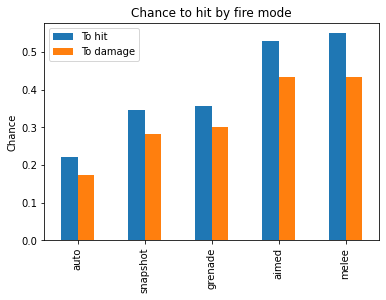

In [6]:
ax = weapon_firemodes_to_hit.plot.bar(title="Chance to hit by fire mode", legend=False)
ax.legend(["To hit", "To damage"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Chance")

## Damage

In [7]:
weapon_firemodes_damage = weapon_firemodes[["turn_damage_expected", "turn_penetrating_damage_expected"]]
weapon_firemodes_damage = weapon_firemodes_damage.sort_values(by=["turn_damage_expected"])

Text(0, 0.5, 'Damage')

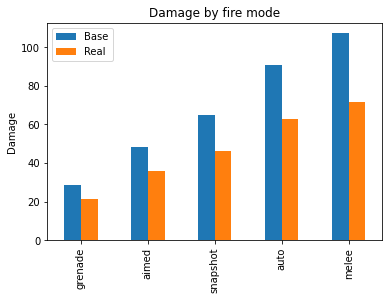

In [8]:
ax = weapon_firemodes_damage.plot.bar(title="Damage by fire mode", legend=False)
ax.legend(["Base", "Real"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Damage")

## Time Units

In [9]:
weapon_firemodes_tus = weapon_firemodes[["time_units"]]
weapon_firemodes_tus = weapon_firemodes_tus.sort_values(by=["time_units"])

Text(0, 0.5, 'Time units')

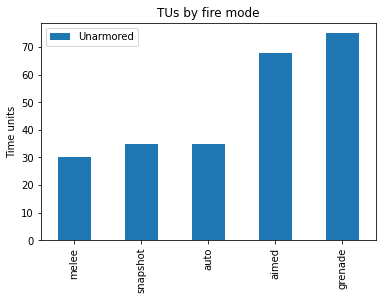

In [10]:
ax = weapon_firemodes_tus.plot.bar(title="TUs by fire mode", legend=False)
ax.legend(["Unarmored", "Armored"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Time units")

## Damage Per Time Unit

In [11]:
weapon_firemodes_dam_tu = weapon_firemodes[["damage_per_time_unit", "penetrating_damage_per_time_unit"]]
weapon_firemodes_dam_tu = weapon_firemodes_dam_tu.sort_values(by=["damage_per_time_unit"])

Text(0, 0.5, 'Ratio')

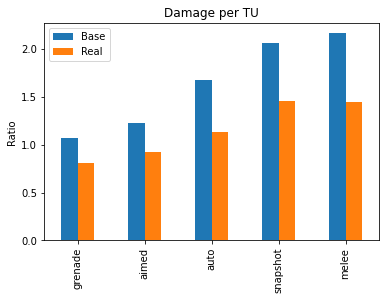

In [12]:
ax = weapon_firemodes_dam_tu.plot.bar(title="Damage per TU", legend=False)
ax.legend(["Base", "Real"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Ratio")